In [2]:
# Install packages
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [23]:
# Set up environment
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry
import re


In [4]:
# Get language name
def get_language_name(code):
    try:
        return pycountry.languages.get(alpha_3=code).name
    except AttributeError:
        return code  # fallback to code if not found


In [5]:
# Import data
records = []
with open('txtBIBLIOGRAPHIC_11573881650004341_01.txt', encoding='utf-8') as f:
    for line in f:
        fields = [field.strip() for field in line.strip().split('\t') if field.strip()]
        record = {}
        for field in fields:
            if ':' in field:
                key, value = field.split(':', 1)
                record[key.strip()] = value.strip()
        records.append(record)

df = pd.DataFrame(records)
df.head()

df['Language_Full'] = df['Language'].apply(get_language_name)

In [6]:
# Overview of data
print("Columns:", df.columns.tolist())
print("\nSample data:")
display(df.head(30))
print("Total records:", len(df))

Columns: ['Title', 'Creator', 'Type', 'Publisher', 'Date', 'Language', 'Format', 'Relation', 'Rights', 'Identifier', 'Description', 'Subject', 'Coverage', 'Contributor', 'Source', 'Language_Full']

Sample data:


,Title,Creator,Type,Publisher,Date,Language,Format,Relation,Rights,Identifier,Description,Subject,Coverage,Contributor,Source,Language_Full
0,Travel /,"Leeson, Edward,1947-2011.",text,London J. Murray,1980,eng,,,,,,"Short stories, English.",,,,English
1,Resource book of test items in chemistry,"Jenkins, E. W.(Edgar William)",text,London Murray,1981,eng,,,,,Bibliography: p15,Chemistry,,,,English
2,Arbitration for contractors,"Stephenson, Douglas A.",text,Northwood Books,1982,,,,,,,,,,,
3,Armorial bearings of the sovereigns of England...,"Petchey, William John. Browne, Royman. Standin...",text,London Bedford Square Press [for the] Standing...,1977,eng,,,,,"Previous ed.: i.e. Revised ed., published as '...",Heraldry,,,,English
4,"Sharing caring : caring, equal opportunities a...","Thompson, Catherine.",text,Community Care Project,[1985],,,,,,,,,,,
5,Environmental impact assessment a bibliography...,"Clark, Brian Drummond. Bisset, Ronald. Wathern...",text,London Mansell Information Publishing [etc.],1980,eng,,,,,Includes index,Environmental impact analysis,,,,English
6,Activities in the park /,"Gains, Pat.",text,[Welwyn Garden City] Nisbet,1985,eng,,,,,Cover title,Amusements.,,,,English
7,Behind bars straight facts about keeping a pub,"Mullis, Peggy.",text,London Pelham,1972,eng,,,,,Bibliographyp.139. - Includes index,"Hotel management. Hotels, taverns, etc.",,,,English
8,Nosework for dogs tracking and related applica...,"Cree, John.",text,London Pelham,1980,eng,,,,,Includes index,Dogs. Tracking and trailing.,,,,English
9,The song and the story /,"St. Clair, Isla. Turnbull, David,1925- British...",text,"London : Pelham,",1981.,eng,,,,,,"Working class Folk songs, English.",,,,English


Total records: 100000


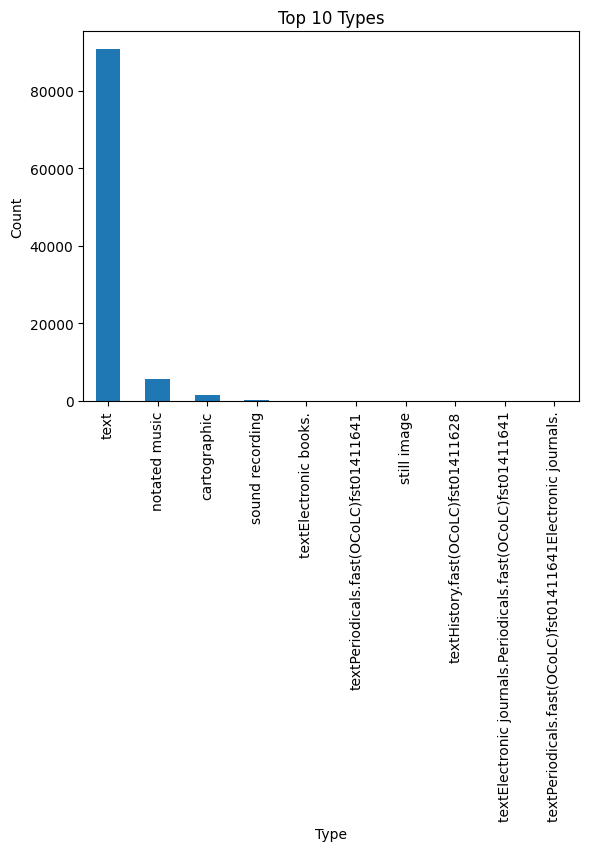

In [7]:
# Visualize the most common types
top_languages = df['Type'].value_counts().head(10)
top_languages.plot(kind='bar', title='Top 10 Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

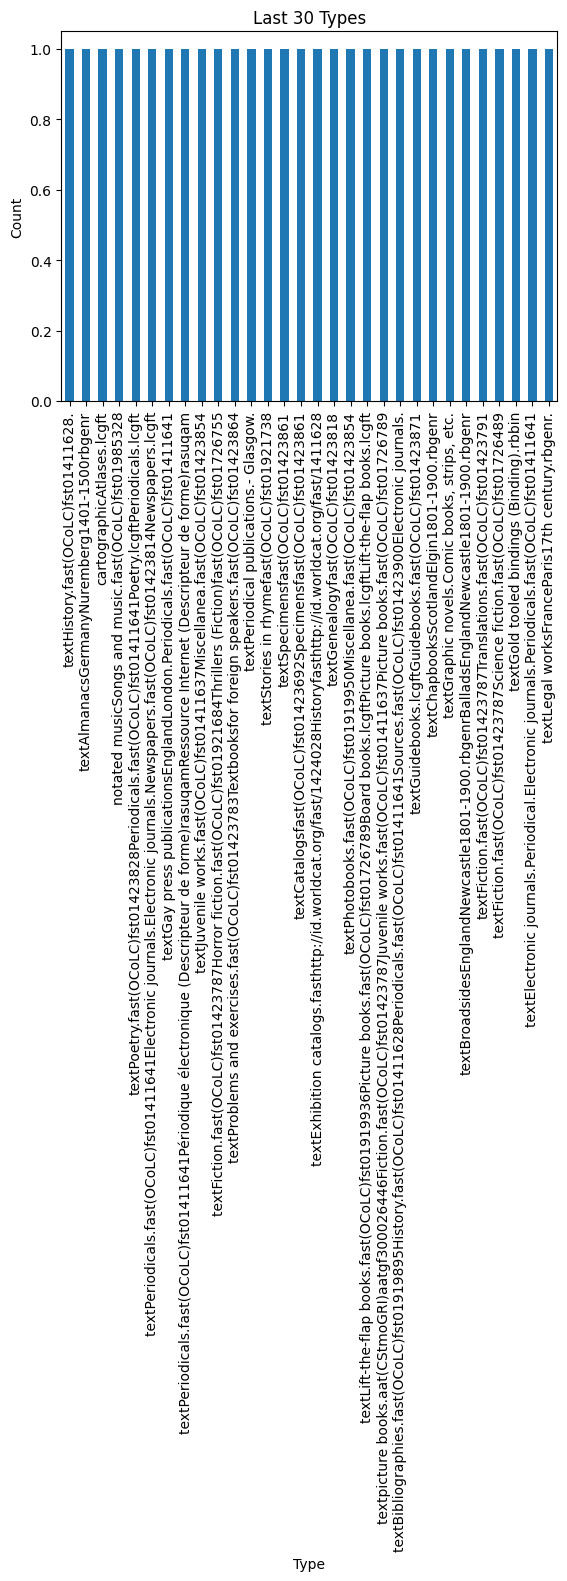

In [8]:
# Visualize the least common types
top_languages = df['Type'].value_counts().tail(30)
top_languages.plot(kind='bar', title='Last 30 Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

In [9]:
# Find types with very few records (potentially underrepresented)
rare_types = df['Type'].value_counts()
rare_types = rare_types[rare_types < 1000]
print("Types with fewer than 1000 records (potential gaps):")
display(rare_types)

Types with fewer than 1000 records (potential gaps):


Type
sound recording                                                                              257
textElectronic books.                                                                        104
textPeriodicals.fast(OCoLC)fst01411641                                                        77
still image                                                                                   75
textHistory.fast(OCoLC)fst01411628                                                            68
                                                                                            ... 
textFiction.fast(OCoLC)fst01423787Translations.fast(OCoLC)fst01423791                          1
textFiction.fast(OCoLC)fst01423787Science fiction.fast(OCoLC)fst01726489                       1
textGold tooled bindings (Binding).rbbin                                                       1
textElectronic journals.Periodical.Electronic journals.Periodicals.fast(OCoLC)fst01411641      1
textLegal worksFrancePari

In [10]:
# Count all types
type_counts = df['Type'].value_counts()
print("Record count for each type:")
display(type_counts)

# Identify rare ones
rare_types = df['Type'].value_counts()
rare_types = type_counts[type_counts < 500]
print("\nTypes with fewer than 500 records (potential gaps):")
display(rare_types)

Record count for each type:


Type
text                                                                                         90842
notated music                                                                                 5591
cartographic                                                                                  1529
sound recording                                                                                257
textElectronic books.                                                                          104
                                                                                             ...  
textFiction.fast(OCoLC)fst01423787Translations.fast(OCoLC)fst01423791                            1
textFiction.fast(OCoLC)fst01423787Science fiction.fast(OCoLC)fst01726489                         1
textGold tooled bindings (Binding).rbbin                                                         1
textElectronic journals.Periodical.Electronic journals.Periodicals.fast(OCoLC)fst01411641        1
textL


Types with fewer than 500 records (potential gaps):


Type
sound recording                                                                              257
textElectronic books.                                                                        104
textPeriodicals.fast(OCoLC)fst01411641                                                        77
still image                                                                                   75
textHistory.fast(OCoLC)fst01411628                                                            68
                                                                                            ... 
textFiction.fast(OCoLC)fst01423787Translations.fast(OCoLC)fst01423791                          1
textFiction.fast(OCoLC)fst01423787Science fiction.fast(OCoLC)fst01726489                       1
textGold tooled bindings (Binding).rbbin                                                       1
textElectronic journals.Periodical.Electronic journals.Periodicals.fast(OCoLC)fst01411641      1
textLegal worksFrancePari

In [11]:
# Count all types
type_counts = df['Type'].value_counts()

# Find how many types have exactly 1 record
num_singletons = (type_counts == 1).sum()

print(f"There are {num_singletons} types that appear exactly once.")

There are 448 types that appear exactly once.


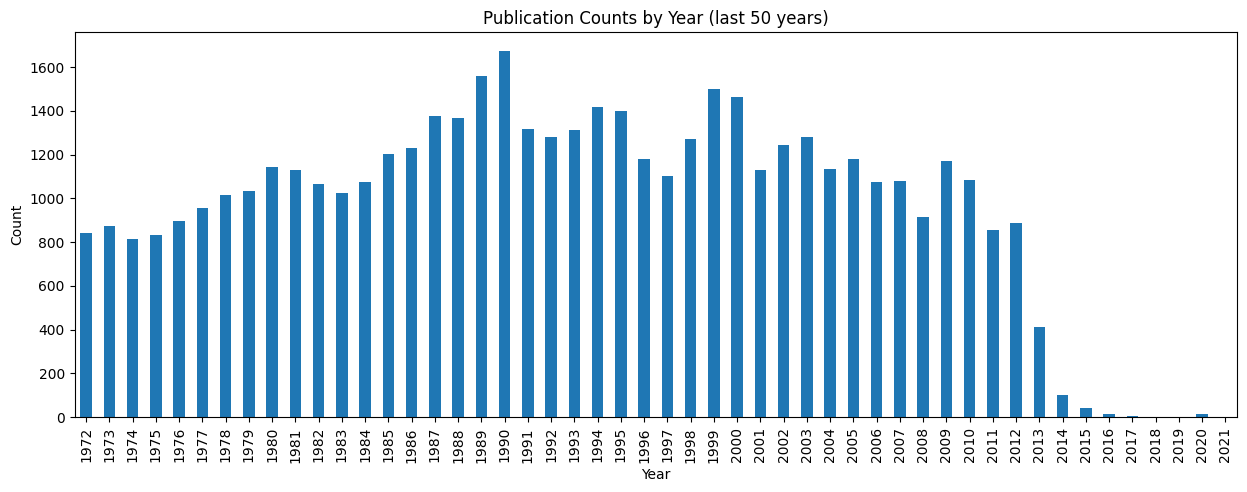

In [12]:
# Visualize the most common publication years (extracting year from 'Date')
df['Year'] = df['Date'].str.extract(r'(\d{4})')
top_years = df['Year'].value_counts().sort_index().tail(50)
top_years.plot(kind='bar', figsize=(15,5), title='Publication Counts by Year (last 50 years)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

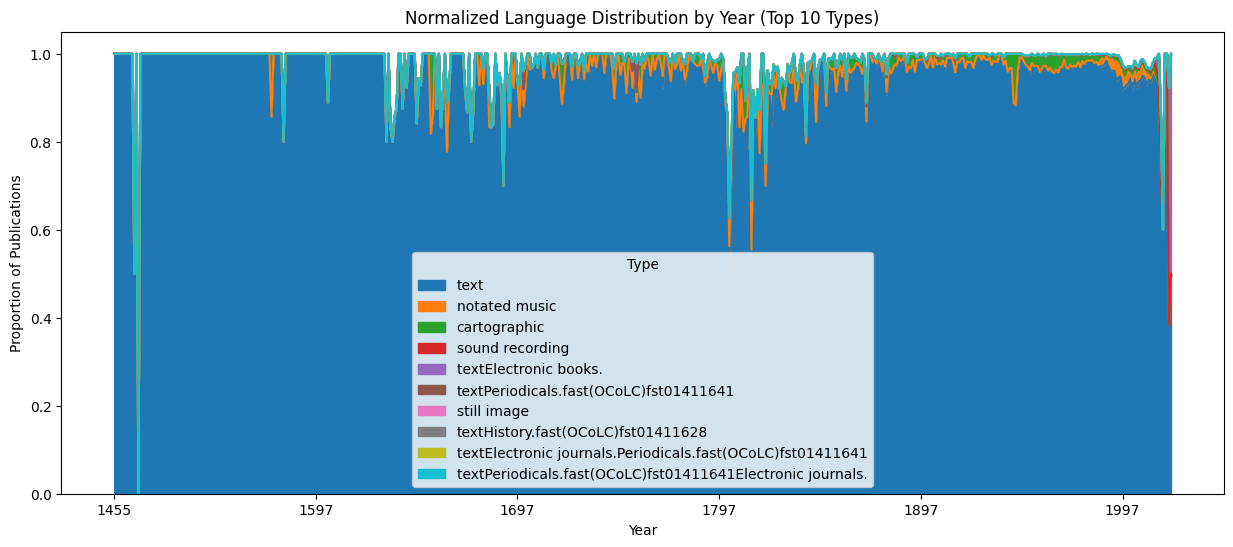

In [13]:
# Group by Year and Type count publications
type_year_counts = df.groupby(['Year', 'Type']).size().unstack(fill_value=0)

# Normalize by total publications per year
type_year_norm = type_year_counts.div(type_year_counts.sum(axis=1), axis=0)

# Plot normalized type distribution for top 10 types
top_types = df['Type'].value_counts().head(10)
top_types = top_types.index[:10]
type_year_norm[top_types].plot(kind='area', stacked=True, figsize=(15,6), colormap='tab10')
plt.title('Normalized Language Distribution by Year (Top 10 Types)')
plt.xlabel('Year')
plt.ylabel('Proportion of Publications')
plt.legend(title='Type')
plt.show()

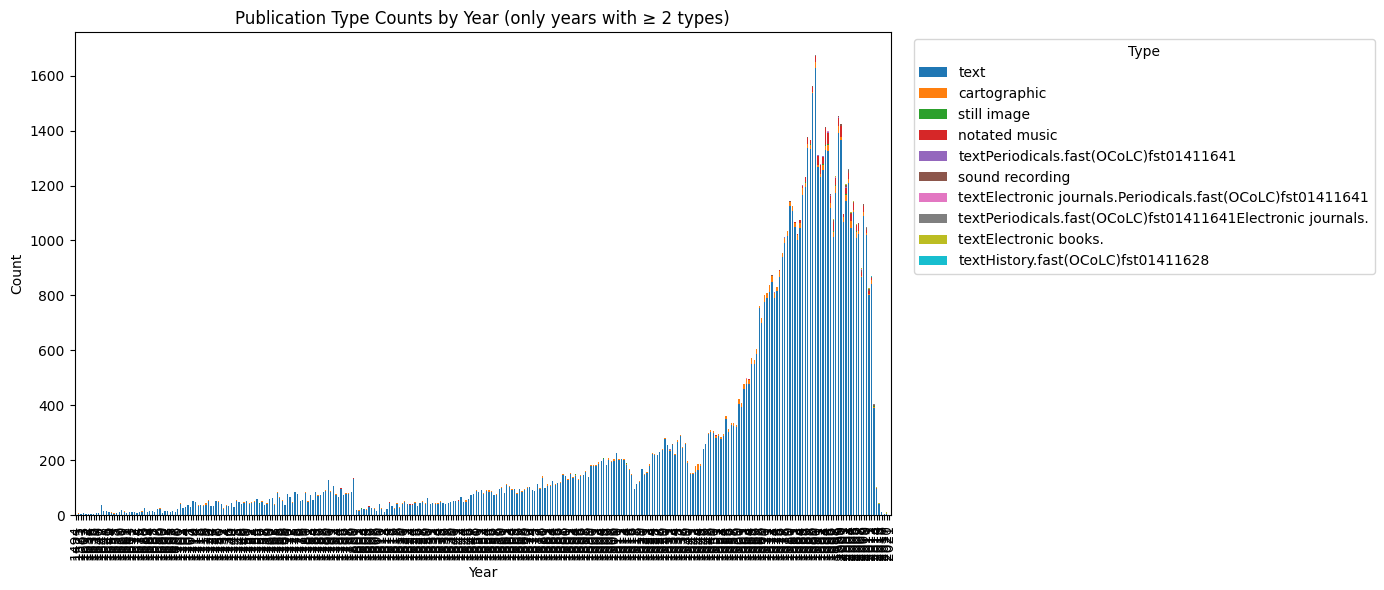

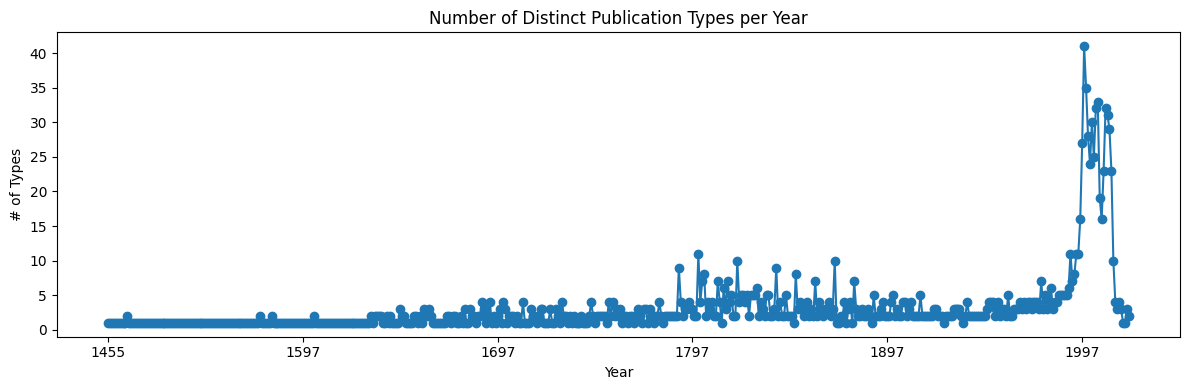

In [14]:
# counts by (Year, Type) → wide table
type_year_counts = (
    df.groupby(['Year', 'Type'])
      .size()
      .unstack(fill_value=0)        # columns = Type, rows = Year
      .sort_index()
)

# keep only years where at least 2 types occurred
mask = (type_year_counts > 0).sum(axis=1) >= 2
multi_type_years = type_year_counts[mask]

# (optional) limit to top N most common types overall to declutter
top_types = df['Type'].value_counts().head(10).index
to_plot = multi_type_years.loc[:, multi_type_years.columns.intersection(top_types)]

# stacked bars of raw counts
ax = to_plot.plot(kind='bar', stacked=True, figsize=(14,6))
ax.set_title('Publication Type Counts by Year (only years with ≥ 2 types)')
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.legend(title='Type', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

# How many different types for each year
distinct_types_per_year = (type_year_counts > 0).sum(axis=1)

ax = distinct_types_per_year.plot(kind='line', marker='o', figsize=(12,4))
ax.set_title('Number of Distinct Publication Types per Year')
ax.set_xlabel('Year')
ax.set_ylabel('# of Types')
plt.tight_layout()
plt.show()

In [15]:
# What's happening in the format column?
df['Format'].unique()
df['Format'].value_counts()

Format
                                  99988
application/pdf                       5
text/html                             3
text/plainapplication/pdf             2
application/pdfapplication/pdf        1
application/pdftext/html              1
Name: count, dtype: int64

In [16]:
# What's happening in the subject column?
df['Subject'].unique()
df['Subject'].value_counts()

Subject
                                               57995
City planning                                    474
English fiction.                                 453
English language                                 265
Children's stories.                              198
                                               ...  
Recidivism Criminal behavior, Prediction of        1
Telecommunication systems Disaster relief          1
PowerBuilder. Application software                 1
Slavery Sectionalism (United States)               1
Shipping Steamboats Tea trade                      1
Name: count, Length: 30817, dtype: int64

In [17]:
# Count all subjects
subject_counts = df['Subject'].value_counts()
print("Record count for each subject:")
display(subject_counts)

# Identify rare ones
rare_subjects = df['Subject'].value_counts()
rare_subjects = subject_counts[subject_counts < 50]
print("\nSubjects with fewer than 50 records (potential gaps):")
display(rare_subjects)

Record count for each subject:


Subject
                                               57995
City planning                                    474
English fiction.                                 453
English language                                 265
Children's stories.                              198
                                               ...  
Recidivism Criminal behavior, Prediction of        1
Telecommunication systems Disaster relief          1
PowerBuilder. Application software                 1
Slavery Sectionalism (United States)               1
Shipping Steamboats Tea trade                      1
Name: count, Length: 30817, dtype: int64


Subjects with fewer than 50 records (potential gaps):


Subject
Day care centers Nursery schools Education, Pre-school    48
Women                                                     47
Geology                                                   47
Bible                                                     44
Railroads                                                 44
                                                          ..
Recidivism Criminal behavior, Prediction of                1
Telecommunication systems Disaster relief                  1
PowerBuilder. Application software                         1
Slavery Sectionalism (United States)                       1
Shipping Steamboats Tea trade                              1
Name: count, Length: 30801, dtype: int64

In [18]:
# Count all subjects
subject_counts = df['Subject'].value_counts()

# Find how many subjects have exactly 1 record
subject_num_singletons = (subject_counts == 1).sum()

print(f"There are {subject_num_singletons} types that appear exactly once.")

There are 27805 types that appear exactly once.


In [19]:
# Top subjects per type
for t in df['Type'].unique():
    print(f"\nTop subjects for {t}:")
    print(df.loc[df['Type'] == t, 'Subject'].value_counts().head(10))



Top subjects for text:
Subject
                        51216
City planning             473
English fiction.          453
English language          258
Children's stories.       198
Bible.                    113
Readers                   102
Mathematics               100
World War, 1939-1945       91
English poetry.            87
Name: count, dtype: int64

Top subjects for notated music:
Subject
                                                                             4998
Rock music                                                                     18
Piano music.                                                                   13
Symphonies                                                                      7
Flute and piano music                                                           5
String quartets                                                                 4
Piano music                                                                     4
Orchestral music           


Top subjects for text:
Subject
                       51216
City planning            473
English fiction.         453
English language         258
Children's stories.      198
Name: count, dtype: int64

Top subjects for notated music:
Subject
                         4998
Rock music                 18
Piano music.               13
Symphonies                  7
Flute and piano music       5
Name: count, dtype: int64

Top subjects for textBroadsidesEnglandLondon1801-1900.rbgenr:
Subject
Napoleon I, Emperor of the French, 1769-1821 Napoleonic Wars, 1800-1815    2
William IV, King of Great Britain, 1765-1837.                              1
Wellington, Arthur Wellesley, Duke of, 1769-1852.                          1
Faith. Conversion                                                          1
Name: count, dtype: int64

Top subjects for textBroadsidesScotlandEdinburgh1801-1900.rbgenr:
Subject
Kirkwood, Robert, -1827.                                1
Paterson, Margaret, of Dalkeith. Murder Ra

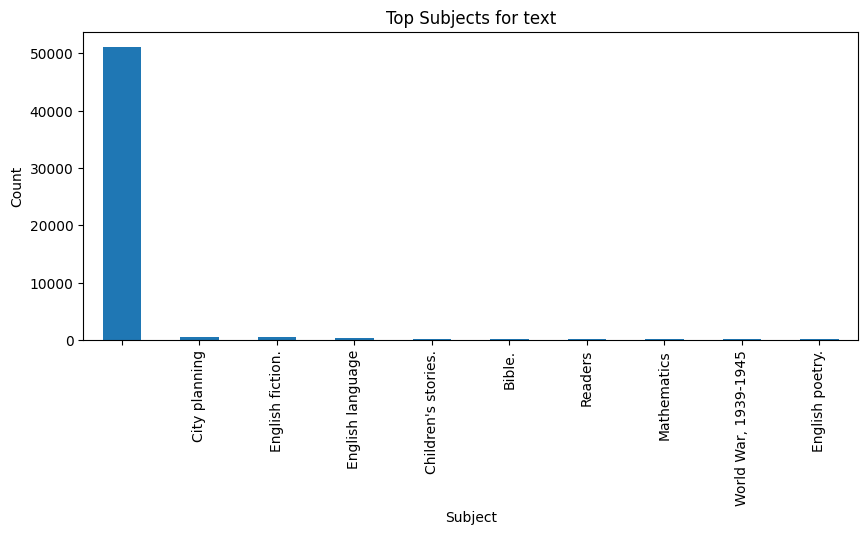

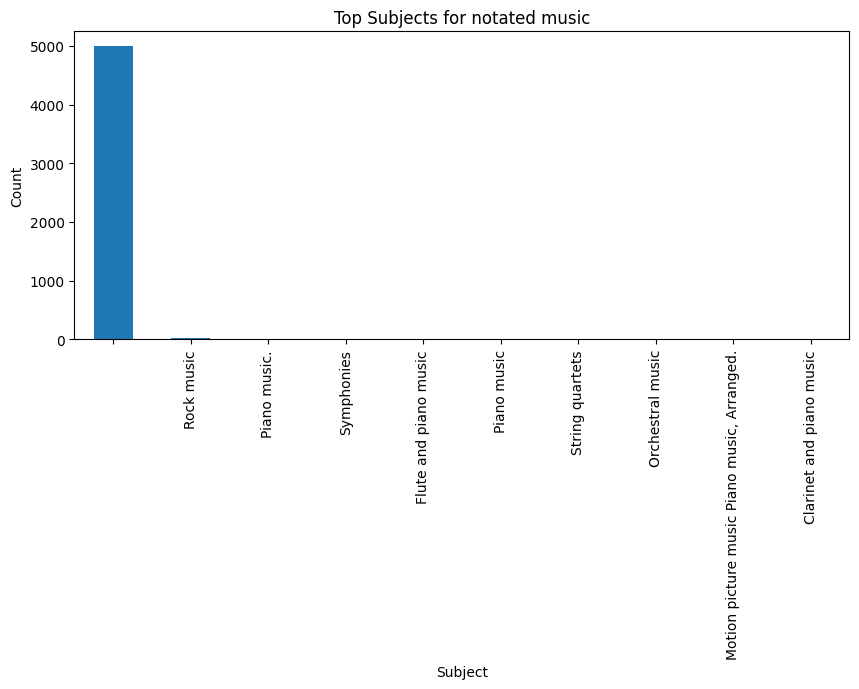

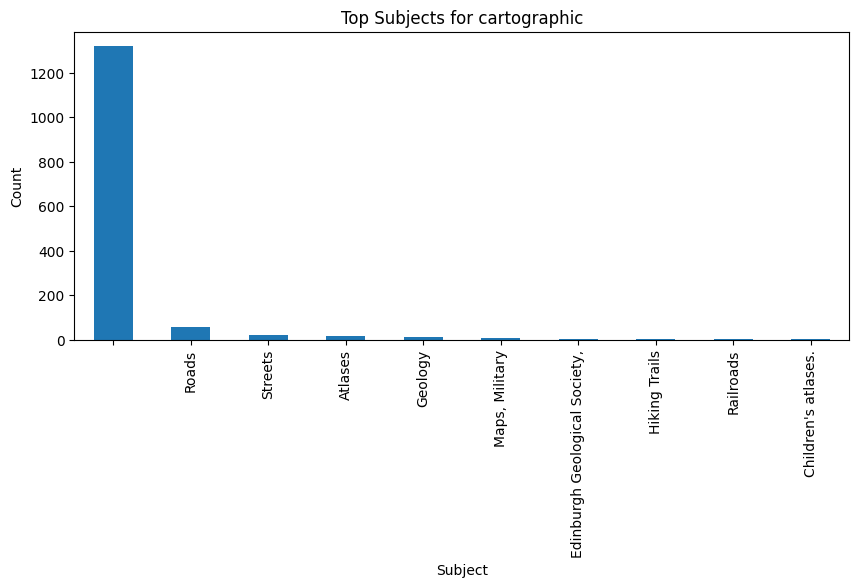

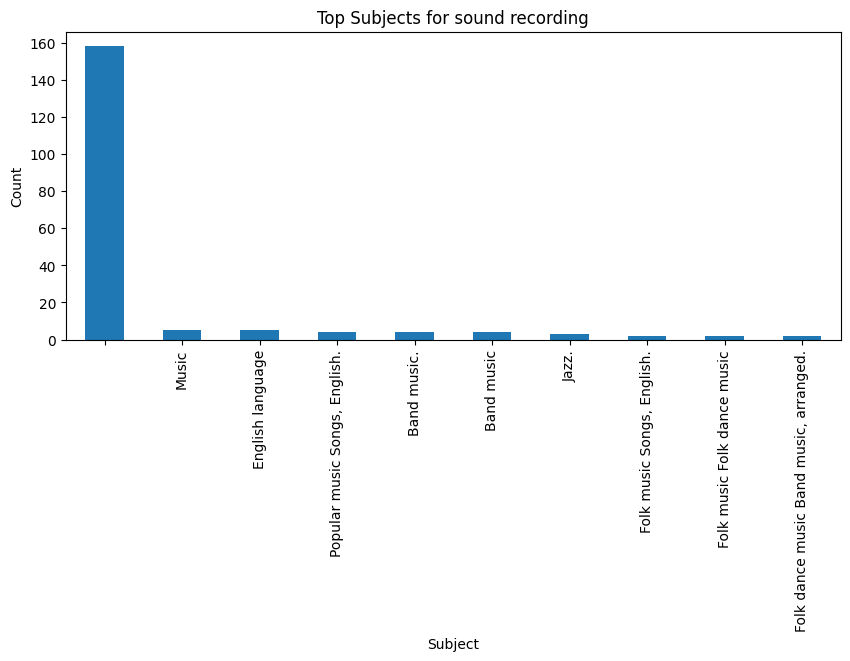

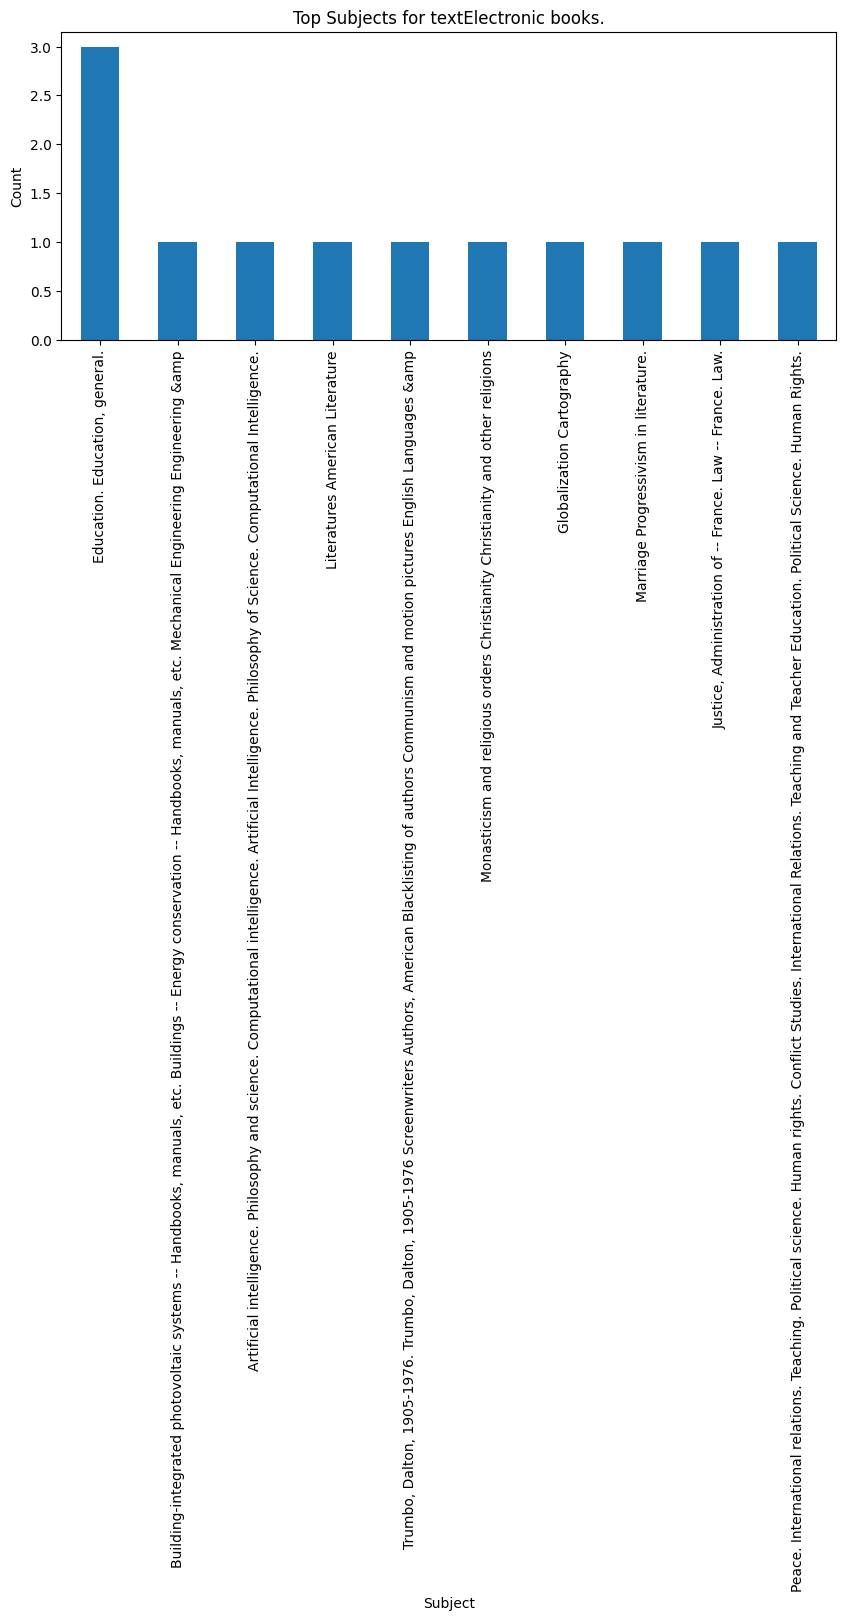

In [20]:
# Split multiple subjects into separate rows
df_exploded = (
    df.assign(Subject=df['Subject'].str.split(';'))
      .explode('Subject')
      .assign(Subject=lambda d: d['Subject'].str.strip())  # clean spaces
)

# Now group and count
type_subject_counts = (
    df_exploded.groupby(['Type', 'Subject'])
               .size()
               .unstack(fill_value=0)
)

# See top subjects per type
for t in df_exploded['Type'].unique():
    print(f"\nTop subjects for {t}:")
    print(df_exploded.loc[df_exploded['Type'] == t, 'Subject'].value_counts().head(5))

top_types = df['Type'].value_counts().head(5).index

for t in top_types:
    df_exploded.loc[df_exploded['Type'] == t, 'Subject'] \
               .value_counts().head(10) \
               .plot(kind='bar', figsize=(10,4), title=f"Top Subjects for {t}")
    plt.xlabel('Subject')
    plt.ylabel('Count')
    plt.show()



Top languages for text:
Language_Full
English    79312
fre         2441
ger         2104
            1222
Latin       1173
Name: count, dtype: int64

Top languages for notated music:
Language_Full
                         4767
English                   374
No linguistic content     364
Latin                      36
fre                         8
Name: count, dtype: int64

Top languages for textBroadsidesEnglandLondon1801-1900.rbgenr:
Language_Full
English    5
Name: count, dtype: int64

Top languages for textBroadsidesScotlandEdinburgh1801-1900.rbgenr:
Language_Full
English    10
Name: count, dtype: int64

Top languages for textFree verse.fast(OCoLC)fst01921664Lyric poetry.fast(OCoLC)fst01921718Narrative poetry.fast(OCoLC)fst01726682Poetry.fast(OCoLC)fst01423828:
Language_Full
English    1
Name: count, dtype: int64

Top languages for cartographic:
Language_Full
English    1168
ger         123
fre          83
Latin        21
Italian      17
Name: count, dtype: int64

Top languages for t

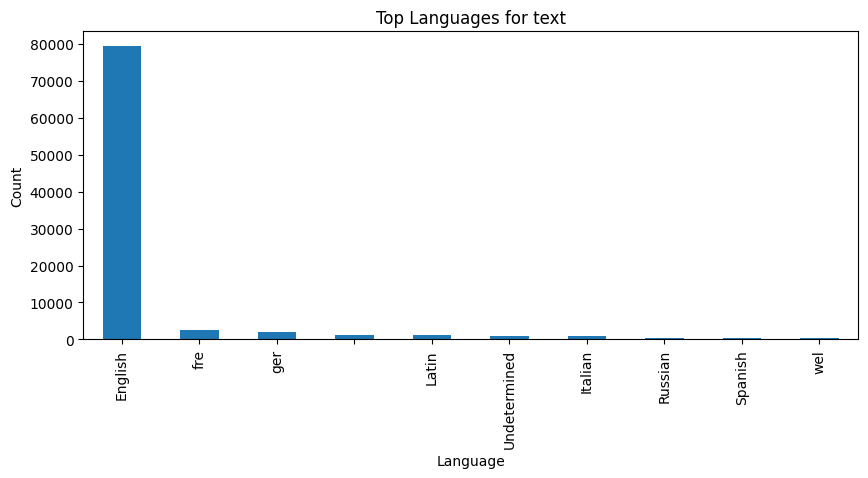

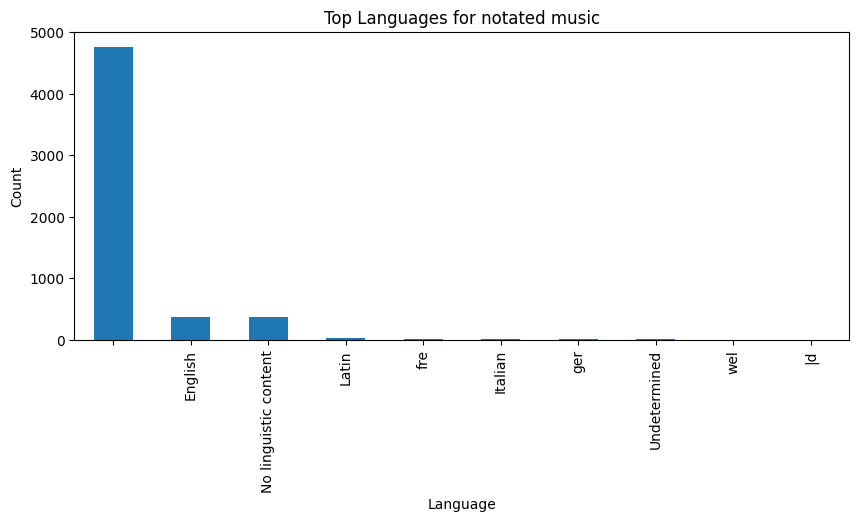

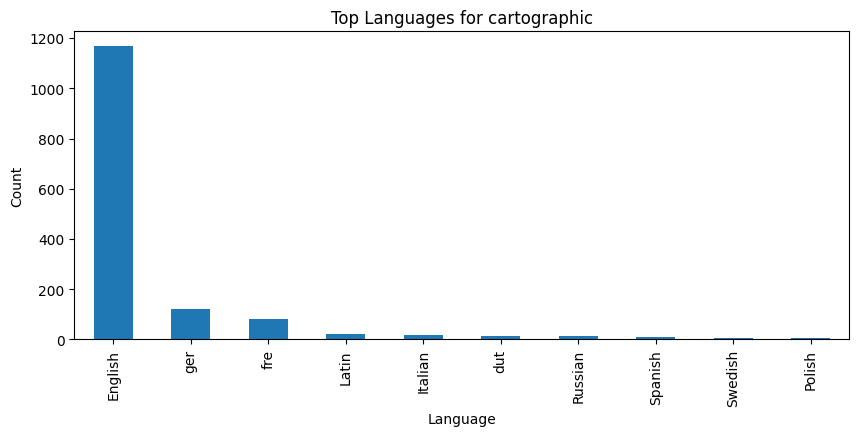

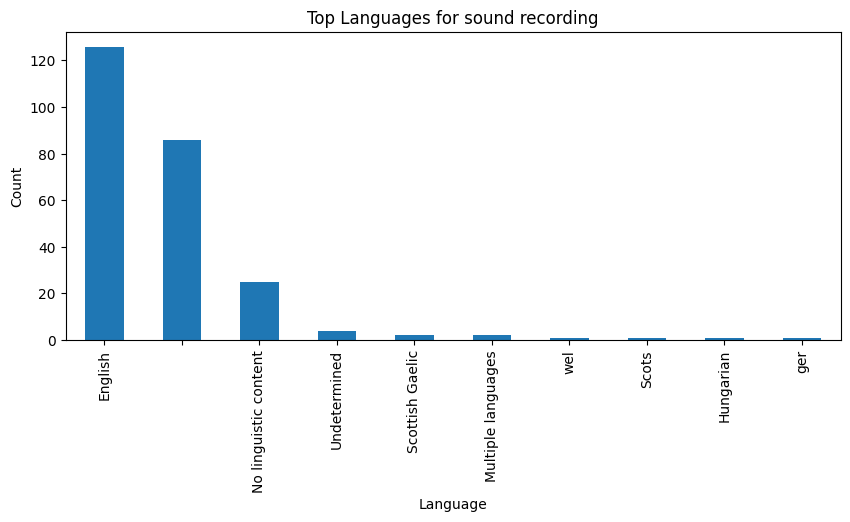

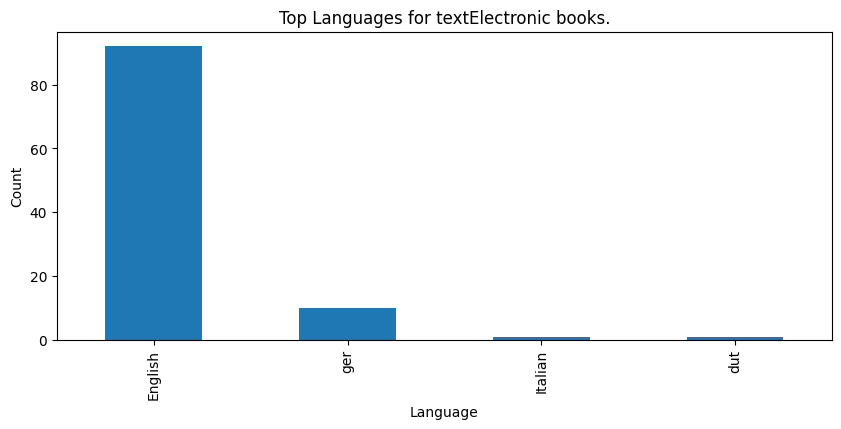

In [21]:
# Group and count languages by type
type_language_counts = (
    df.groupby(['Type', 'Language_Full'])
               .size()
               .unstack(fill_value=0)
)

# See top languages per type
for t in df['Type'].unique():
    print(f"\nTop languages for {t}:")
    print(df.loc[df['Type'] == t, 'Language_Full'].value_counts().head(5))

top_types = df['Type'].value_counts().head(5).index

for t in top_types:
    df.loc[df['Type'] == t, 'Language_Full'] \
               .value_counts().head(10) \
               .plot(kind='bar', figsize=(10,4), title=f"Top Languages for {t}")
    plt.xlabel('Language')
    plt.ylabel('Count')
    plt.show()



Top types for English:
Type
text                     79312
cartographic              1168
notated music              374
sound recording            126
textElectronic books.       92
Name: count, dtype: int64

Top types for :
Type
notated music               4767
text                        1222
sound recording               86
three dimensional object       1
Name: count, dtype: int64

Top types for Undetermined:
Type
text                                                         965
notated music                                                  6
sound recording                                                4
textElectronic journalsPeriodicals.fast(OCoLC)fst01411641      1
sound recordingCompact discs.lcsh                              1
Name: count, dtype: int64

Top types for Russian:
Type
text                                                                                                 528
cartographic                                                                               

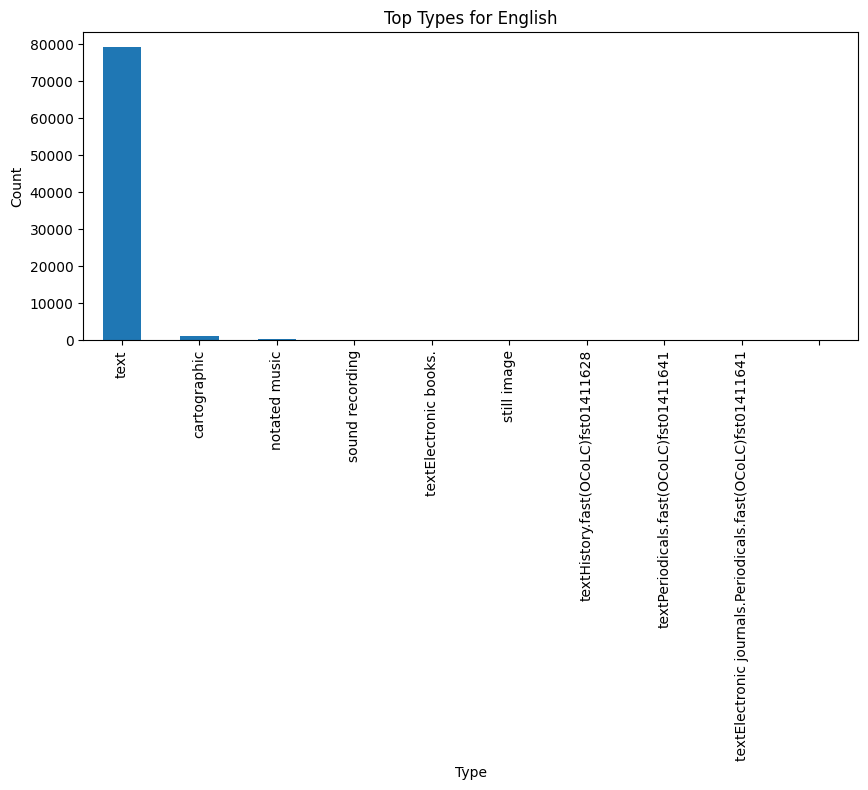

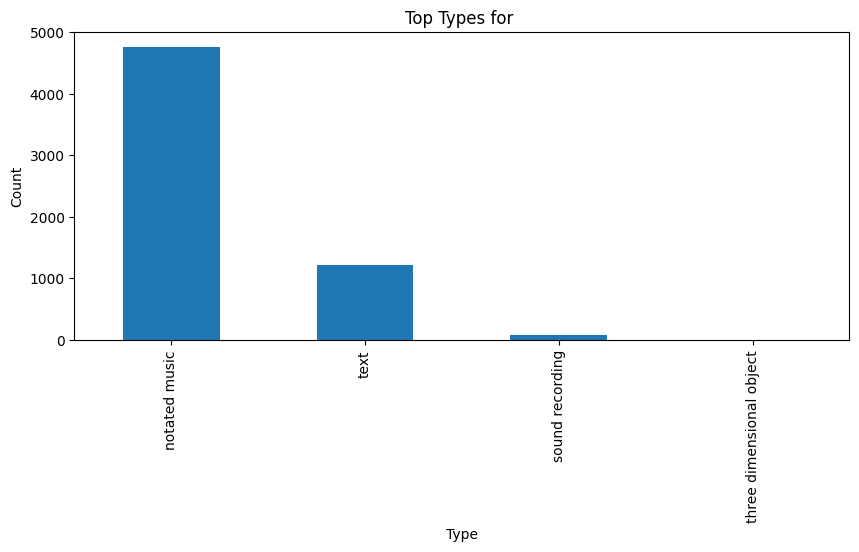

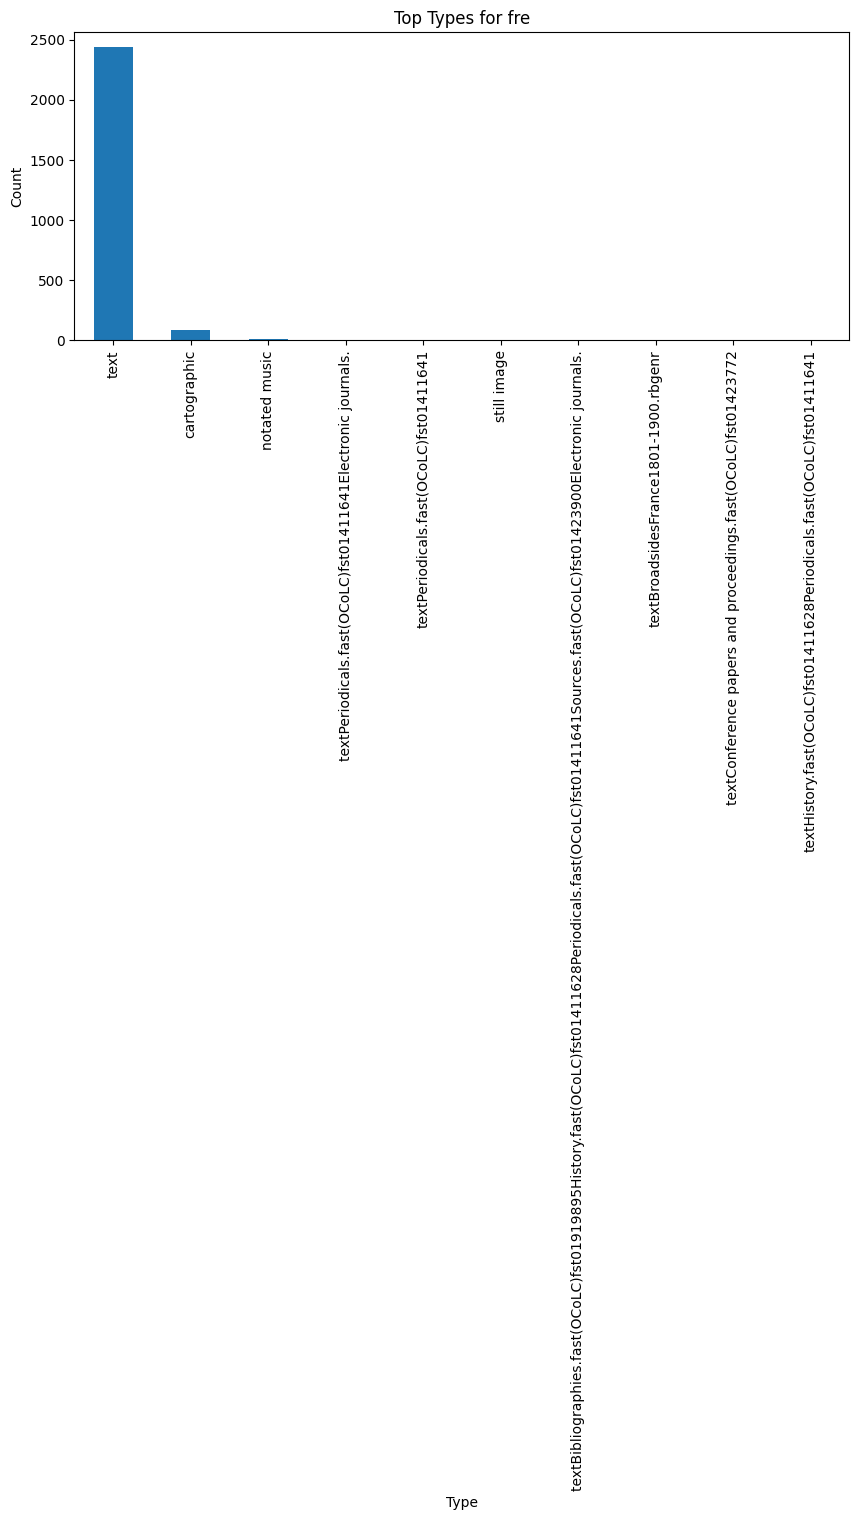

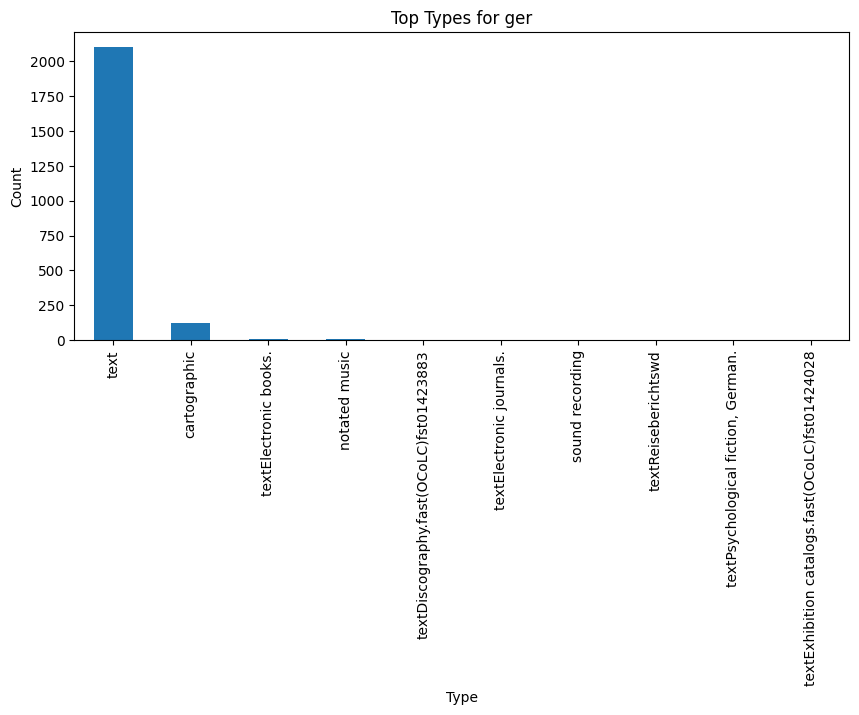

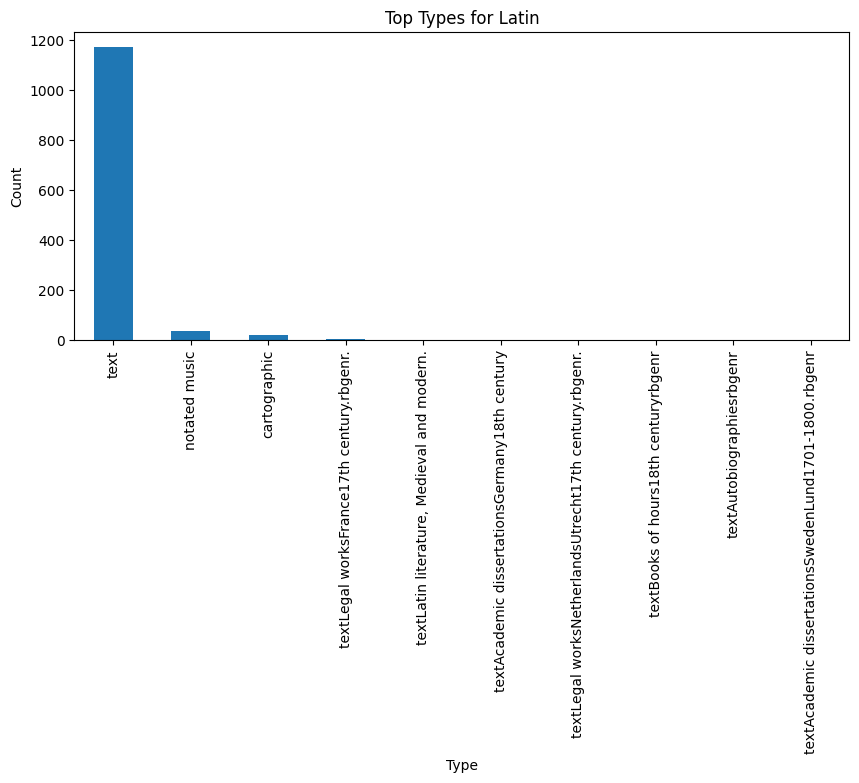

In [22]:
# Group and count types by typelanguage
language_type_counts = (
    df.groupby(['Language_Full','Type'])
               .size()
               .unstack(fill_value=0)
)

# See top type per language
for t in df['Language_Full'].unique():
    print(f"\nTop types for {t}:")
    print(df.loc[df['Language_Full'] == t, 'Type'].value_counts().head(5))

top_types = df['Language_Full'].value_counts().head(5).index

for t in top_types:
    df.loc[df['Language_Full'] == t, 'Type'] \
               .value_counts().head(10) \
               .plot(kind='bar', figsize=(10,4), title=f"Top Types for {t}")
    plt.xlabel('Type')
    plt.ylabel('Count')
    plt.show()

In [ ]:
# text cleaning
def clean_raw(value):
    v = value.lower().strip()
    v = re.sub(r'\.fast\(oco.*?\)', '', v)  # remove FAST codes
    v = re.sub(r'\.rb\w+', '', v)           # remove rbbin, rbgenr, etc.
    v = re.sub(r'\s+', ' ', v)
    return v

type_keywords = [
    'text', 'sound recording', 'cartographic', 'notated music',
    'still image', 'computer file', 'three-dimensional object', 'mixed material'
]


